In [1]:
import os
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
# MAGIC COMMANDS
get_ipython().magic(u'matplotlib inline')

In [3]:
path_data = os.getcwd() + "\\..\\data\\"

In [4]:
path_data

'C:\\Users\\Parmen\\Desktop\\spotify_clustering\\scripts\\..\\data\\'

In [5]:
# LOAD DATA FILES
data = pd.read_csv(path_data + 'data.csv')

In [6]:
#######################
# EXPLORATORY ANALYSIS
#######################

In [7]:
#data

In [8]:
data[data['speechiness']>0.]

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.010200,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.199000,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.034400,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.604000,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.180000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
5,5,0.004790,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4.0,0.264,1,Sneakin’,Drake
6,6,0.014500,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4.0,0.308,1,Childs Play,Drake
7,7,0.020200,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4.0,0.393,1,Gyöngyhajú lány,Omega
8,8,0.048100,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4.0,0.398,1,I've Seen Footage,Death Grips
9,9,0.002080,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4.0,0.386,1,Digital Animal,Honey Claws


In [9]:
data[['speechiness']].describe()

,speechiness
count,2017.000000
mean,0.092664
std,0.089931
min,0.023100
25%,0.037500
50%,0.054900
75%,0.108000
max,0.816000


In [10]:
#data[['instrumentalness', 'speechiness', 'song_title', 'artist']]

In [11]:
data.describe().loc[['min', 'max']]

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
min,0.0,0.000003,0.122,16042.0,0.0148,0.000,0.0,0.0188,-33.097,0.0,0.0231,47.859,1.0,0.0348,0.0
max,2016.0,0.995000,0.984,1004627.0,0.9980,0.976,11.0,0.9690,-0.307,1.0,0.8160,219.331,5.0,0.9920,1.0


In [12]:
# Get name and type of features
#for x in training_df.columns:
# print (x, training_df[x].dtype)
print ('number of features: ', len(data.columns))


number of features:  17


In [13]:
#######################
# PREPROCESSING
#######################

In [14]:
# Remove IDs
data.drop(['Unnamed: 0', 'target'], axis=1, inplace=True)

In [15]:
#data['energy']

In [16]:
#data[['energy']]

In [17]:
#######################
# FEATURE ENGINEERING
#######################

In [18]:
#data['nchars_title'] = data['song_title'].apply(len)

In [19]:
song_title_artist = data[['song_title', 'artist']]

In [20]:
data.drop(['song_title', 'artist', 'duration_ms'], axis=1, inplace=True)

In [21]:
################
# VISUALIZACION
################

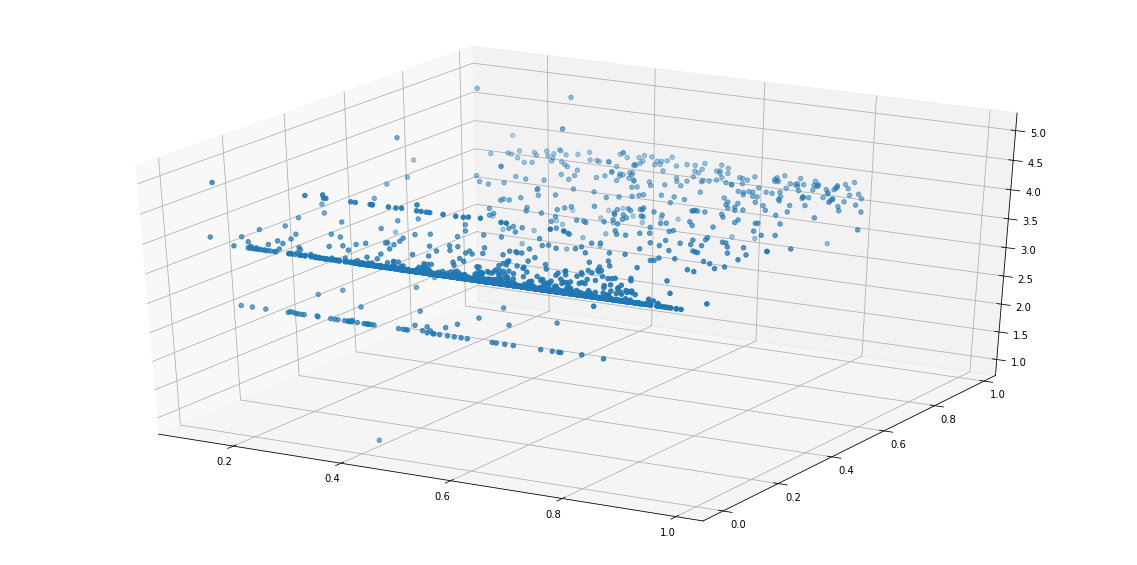

In [28]:
# Visualizar 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['danceability'], data['instrumentalness'], data['time_signature'])

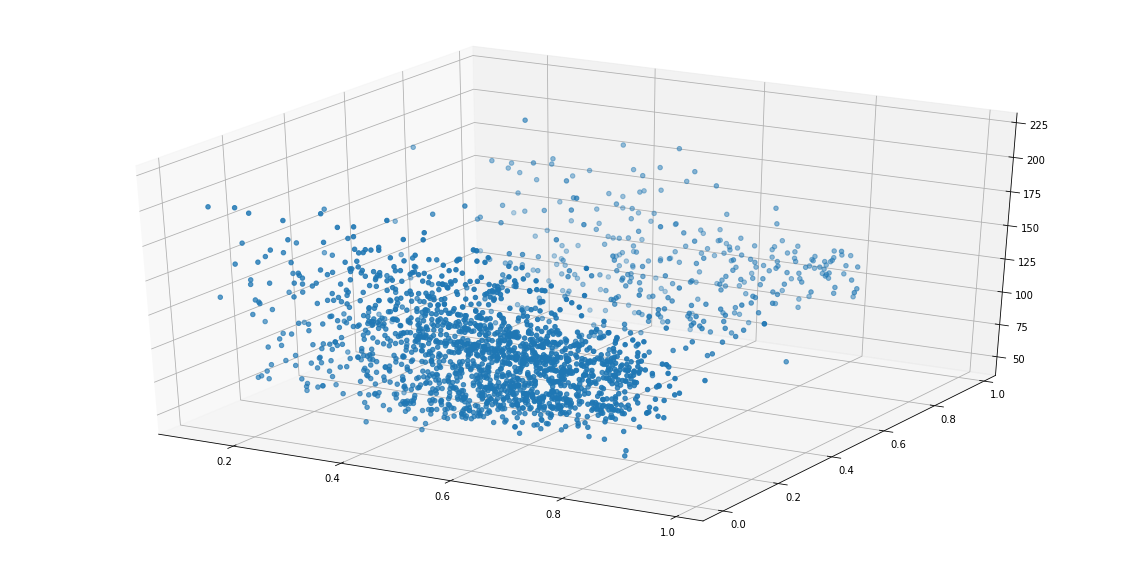

In [25]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['danceability'], data['instrumentalness'], data['tempo'])

In [45]:
pca = PCA(n_components=3)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
data_reducido = pd.DataFrame(pca.transform(data), columns=['a', 'b', 'c'])

In [47]:
#pca.transform(data)

In [48]:
#data_reducido

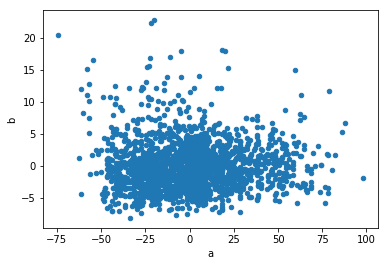

In [49]:
data_reducido.plot(kind='scatter', x='a', y='b');

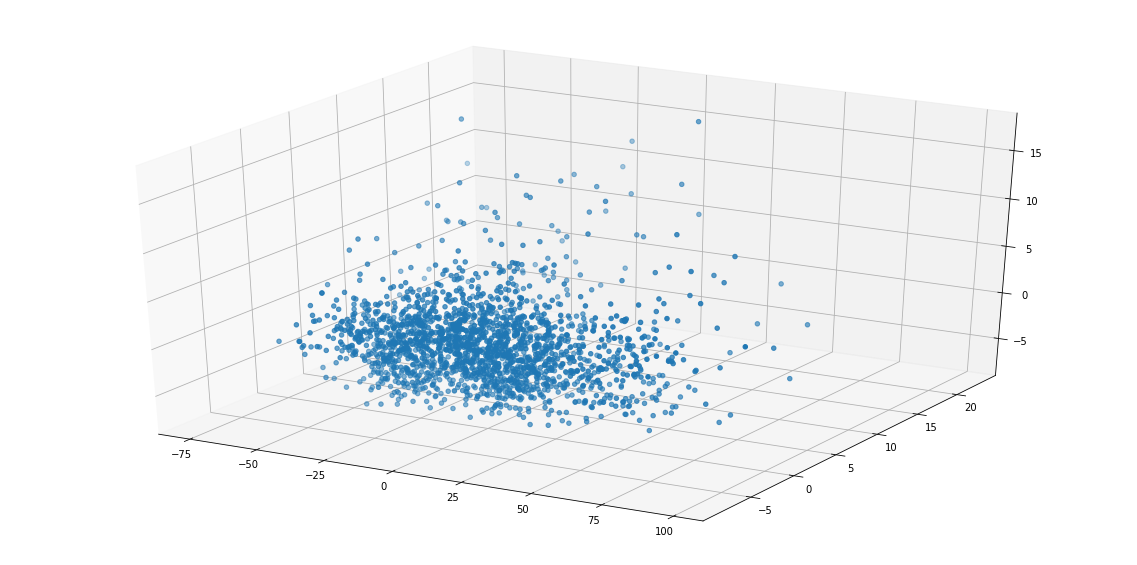

In [50]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_reducido['a'], data_reducido['b'], data_reducido['c'])

In [51]:
##############
# CLUSTERING
##############

In [79]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [74]:
vars = ['danceability', 'instrumentalness', 'time_signature']
kmeans = KMeans(n_clusters=6, random_state=0).fit(data[vars])

In [86]:
vars = ['danceability', 'instrumentalness', 'time_signature']
# kmeans = KMeans(n_clusters=5, random_state=0).fit(data[vars])
# data_clustering = pd.concat([data[vars], song_title_artist, pd.DataFrame(kmeans.labels_, columns = ["cluster"])], axis = 1)
# # Visualizar 
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111, projection='3d')

# for c, m, i in [('r', 'o', 0), ('b', '^',1), ('y', 'x', 2), ('g', '^', 3), ('m', '*', 4)]:
#     data_plot = data_clustering[data_clustering['cluster']==i]
#     ax.scatter(data_plot[vars[0]], data_plot[vars[1]], data_plot[vars[2]], c=c, marker=m)

    
# ax.set_xlabel(vars[0])
# ax.set_ylabel(vars[1])
# ax.set_zlabel(vars[2])

Text(0.5,0,'time_signature')

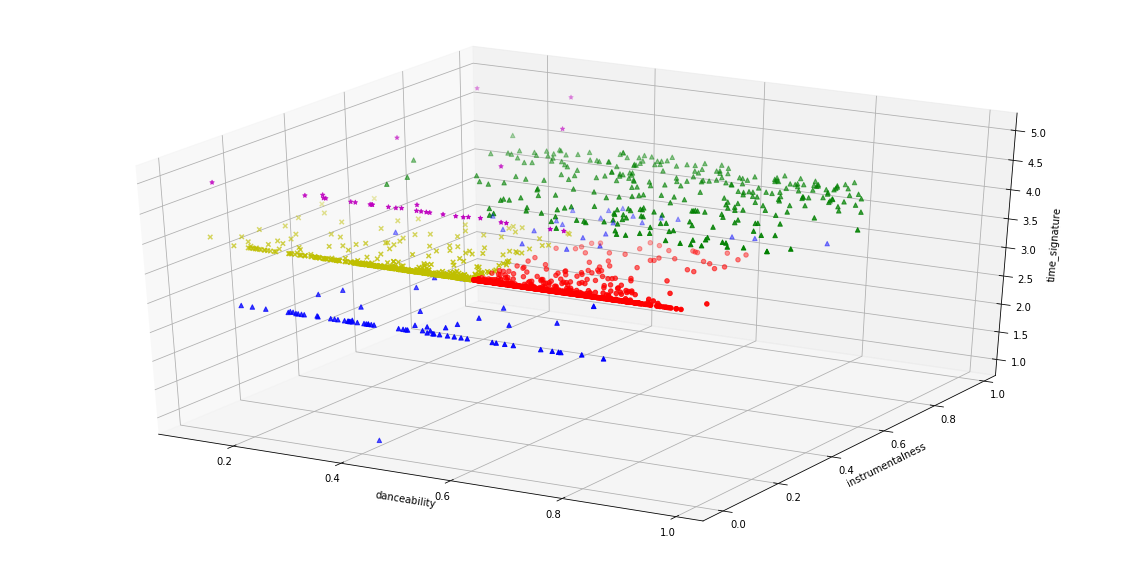

In [84]:
vars = ['danceability', 'instrumentalness', 'time_signature']
kmeans = KMeans(n_clusters=5, random_state=0).fit(data[vars])
data_clustering = pd.concat([data[vars], song_title_artist, pd.DataFrame(kmeans.labels_, columns = ["cluster"])], axis = 1)
# Visualizar 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for c, m, i in [('r', 'o', 0), ('b', '^',1), ('y', 'x', 2), ('g', '^', 3), ('m', '*', 4)]:
    data_plot = data_clustering[data_clustering['cluster']==i]
    ax.scatter(data_plot[vars[0]], data_plot[vars[1]], data_plot[vars[2]], c=c, marker=m)

    
ax.set_xlabel(vars[0])
ax.set_ylabel(vars[1])
ax.set_zlabel(vars[2])

In [85]:
kmeans.score(data[vars])

-56.547111516378223

In [89]:
data_clustering[data_clustering['cluster']==1]

,danceability,instrumentalness,time_signature,song_title,artist,cluster
10,0.525,0.014300,3.0,Subways - In Flagranti Extended Edit,The Avalanches,1
48,0.796,0.004570,3.0,Azon de ma gnin kpevi,T. P. Orchestre Poly-Rythmo,1
77,0.537,0.000019,3.0,I Shall Be Released - Remastered,Nina Simone,1
160,0.427,0.000055,3.0,Coming Home,Leon Bridges,1
258,0.283,0.004890,3.0,Better,Banks,1
263,0.388,0.008830,3.0,Sugar for the Queen,Bells Atlas,1
274,0.379,0.000010,3.0,Apathy,Shlohmo,1
296,0.535,0.046400,3.0,Hot Dreams,Timber Timbre,1
316,0.587,0.000035,3.0,Ambling Alp,Yeasayer,1
348,0.402,0.000000,3.0,Powerful,Major Lazer,1


In [ ]:
###########################################

Text(0.5,0,'tempo')

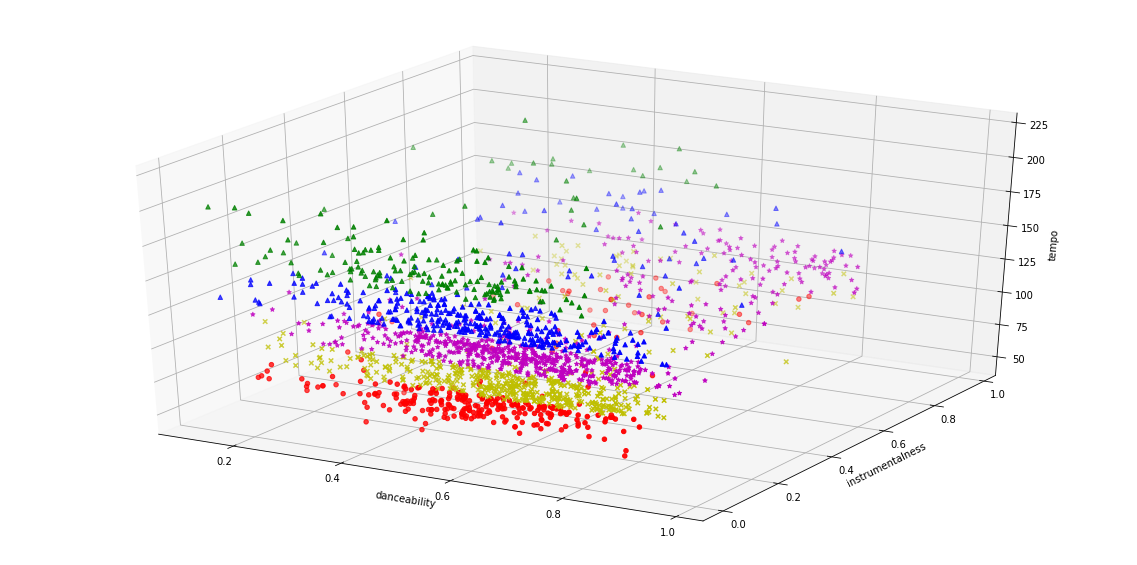

In [70]:
vars = ['danceability', 'instrumentalness', 'tempo']
kmeans = KMeans(n_clusters=5, random_state=0).fit(data[vars])
data_clustering = pd.concat([data[vars], song_title_artist, pd.DataFrame(kmeans.labels_, columns = ["cluster"])], axis = 1)
# Visualizar 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

for c, m, i in [('r', 'o', 0), ('b', '^',1), ('y', 'x', 2), ('g', '^', 3), ('m', '*', 4)]:
    data_plot = data_clustering[data_clustering['cluster']==i]
    ax.scatter(data_plot[vars[0]], data_plot[vars[1]], data_plot[vars[2]], c=c, marker=m)

    
ax.set_xlabel(vars[0])
ax.set_ylabel(vars[1])
ax.set_zlabel(vars[2])


In [71]:
kmeans.score(data[vars])

-93785.624167131464

In [61]:
# Cluster with two vars
# vars = ['danceability', 'instrumentalness']
# kmeans = KMeans(n_clusters=5, random_state=0).fit(data[vars])
# data_clustering = pd.concat([data[vars], song_title_artist, pd.DataFrame(kmeans.labels_, columns = ["cluster"])], axis = 1)
# # Visualizar 
# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111)#, projection='3d')

# for c, m, i in [('r', 'o', 0), ('b', '^',1), ('y', 'x', 2), ('g', '^', 3), ('m', '*', 4)]:
#     data_plot = data_clustering[data_clustering['cluster']==i]
#     ax.scatter(data_plot[vars[1]], data_plot[vars[0]], c=c, marker=m)

# ax.set_xlabel(vars[1])
# ax.set_ylabel(vars[0])


In [35]:
#data.plot(kind='scatter',x='instrumentalness',y='speechiness')

In [36]:
#print(sns.lmplot.__doc__)

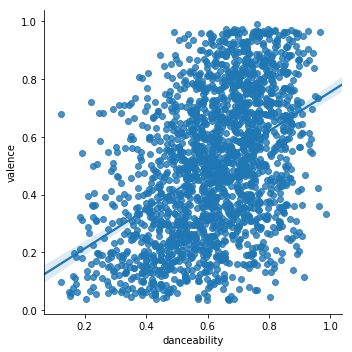

In [56]:
sns.lmplot(x = 'danceability', y = 'valence', data = data, fit_reg=True)

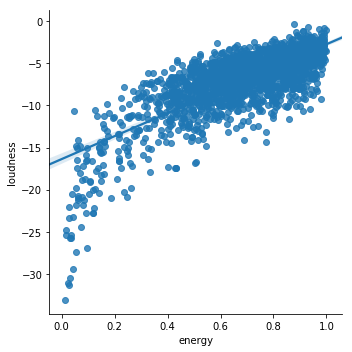

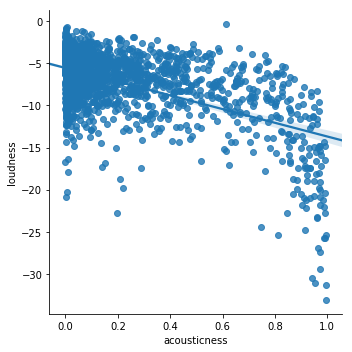

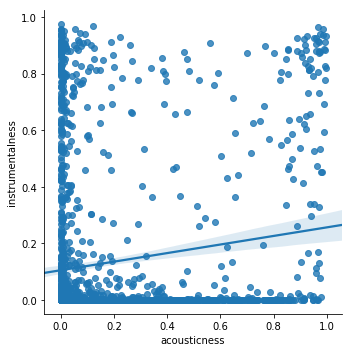

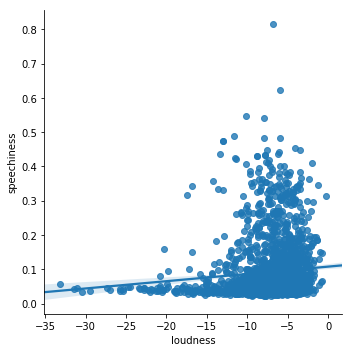

In [71]:


sns.lmplot(x = 'energy', y = 'loudness', data = data, fit_reg=True)
sns.lmplot(x = 'acousticness', y = 'loudness', data = data, fit_reg=True)
sns.lmplot(x = 'acousticness', y = 'instrumentalness', data = data, fit_reg=True)
sns.lmplot(x = 'loudness', y = 'speechiness', data = data, fit_reg=True)

In [72]:
print(scatter_matrix.__doc__)


    Draw a matrix of scatter plots.

    Parameters
    ----------
    frame : DataFrame
    alpha : float, optional
        amount of transparency applied
    figsize : (float,float), optional
        a tuple (width, height) in inches
    ax : Matplotlib axis object, optional
    grid : bool, optional
        setting this to True will show the grid
    diagonal : {'hist', 'kde'}
        pick between 'kde' and 'hist' for
        either Kernel Density Estimation or Histogram
        plot in the diagonal
    marker : str, optional
        Matplotlib marker type, default '.'
    hist_kwds : other plotting keyword arguments
        To be passed to hist function
    density_kwds : other plotting keyword arguments
        To be passed to kernel density estimate plot
    range_padding : float, optional
        relative extension of axis range in x and y
        with respect to (x_max - x_min) or (y_max - y_min),
        default 0.05
    kwds : other plotting keyword arguments
        To be p

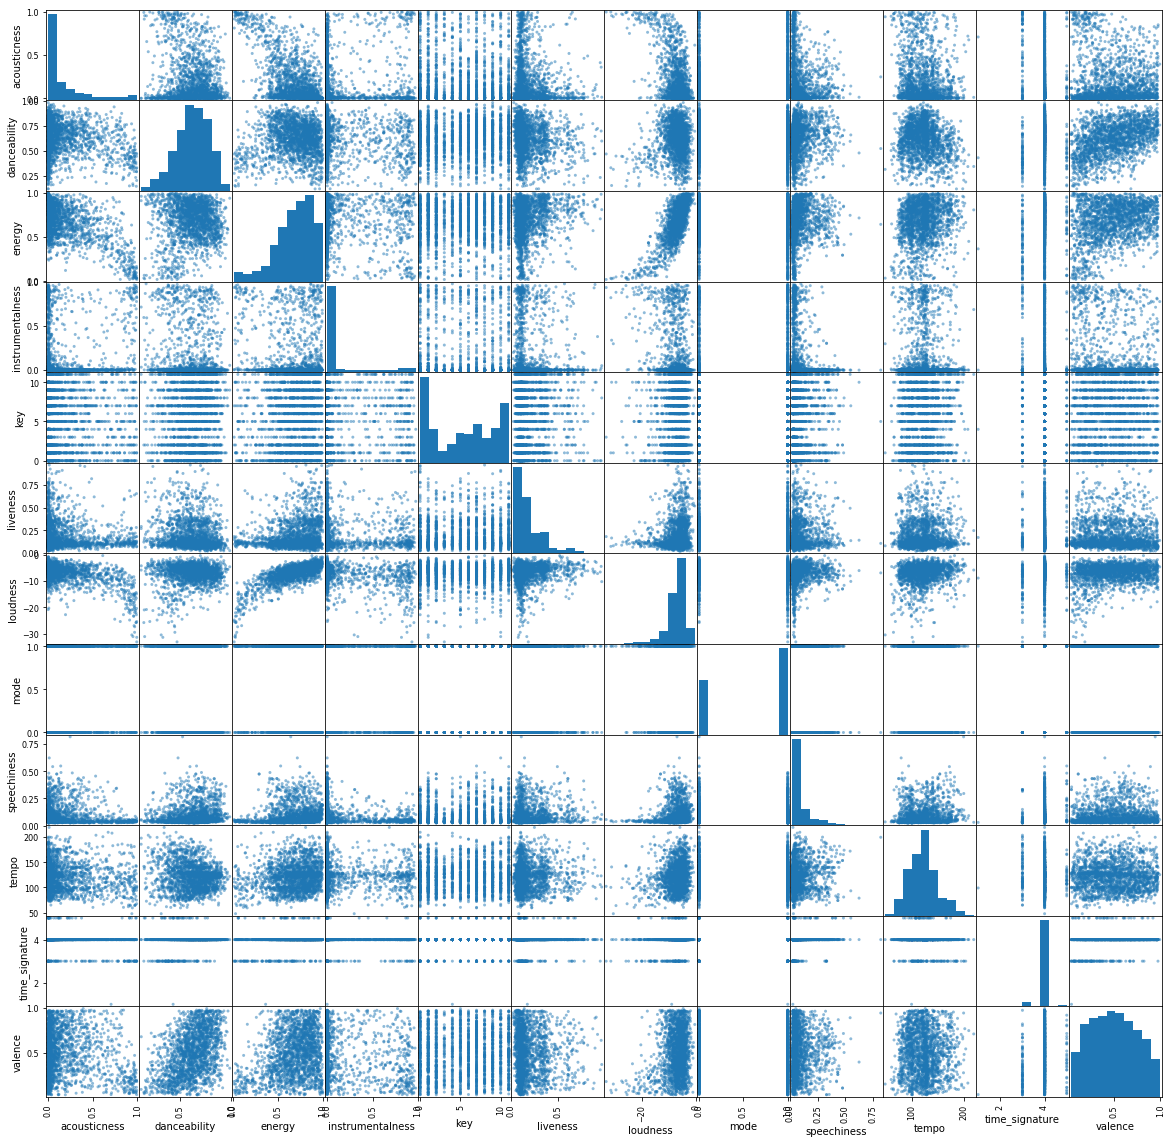

In [29]:
_ = scatter_matrix(data, figsize=(20,20))

In [30]:
#data

In [34]:
kmeans.labels_

array([0, 0, 0, ..., 0, 3, 2])

In [31]:
data_clustering = pd.concat([data[[]], song_title_artist, pd.DataFrame(kmeans.labels_, columns = ["cluster"])], axis = 1)

In [32]:
data_clustering[data_clustering['cluster']==4][['song_title','artist','cluster']].iloc[0:2] # psy tranquileo (rock, soul)

,song_title,artist,cluster
9,Digital Animal,Honey Claws,4
10,Subways - In Flagranti Extended Edit,The Avalanches,4


In [33]:
data_clustering[data_clustering['cluster']==2][['song_title','artist','cluster']] # hip hop /rap /trap

,song_title,artist,cluster
8,I've Seen Footage,Death Grips,2
12,Cemalim,Erkin Koray,2
13,One Night,Lil Yachty,2
14,Oh lala,PNL,2
16,World In Motion,New Order,2
17,One Nation Under a Groove,Funkadelic,2
20,Percolator (Jamie Jones Vault Mix) - mixed,Cajmere,2
21,House of Jealous Lovers,The Rapture,2
28,Look Alive,Rae Sremmurd,2
29,Please Stop Making Fake Versace,Father,2


In [34]:
data_clustering[data_clustering['cluster']==1][['song_title','artist','cluster']].iloc[0:2] 

,song_title,artist,cluster
0,Mask Off,Future,1
1,Redbone,Childish Gambino,1
